In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from os import path
path = '/content/drive/MyDrive/CSV/housing.csv'
df = pd.read_csv(path)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
df_new = df[["longitude","latitude"]]
df_new.head

<bound method NDFrame.head of        longitude  latitude
0        -122.23     37.88
1        -122.22     37.86
2        -122.24     37.85
3        -122.25     37.85
4        -122.25     37.85
...          ...       ...
20635    -121.09     39.48
20636    -121.21     39.49
20637    -121.22     39.43
20638    -121.32     39.43
20639    -121.24     39.37

[20640 rows x 2 columns]>

In [4]:
df_new.describe()

,longitude,latitude
count,20640.000000,20640.000000
mean,-119.569704,35.631861
std,2.003532,2.135952
min,-124.350000,32.540000
25%,-121.800000,33.930000
50%,-118.490000,34.260000
75%,-118.010000,37.710000
max,-114.310000,41.950000


In [5]:
df_new.isnull().sum() #mencari apakah ada data yang null

longitude    0
latitude     0
dtype: int64

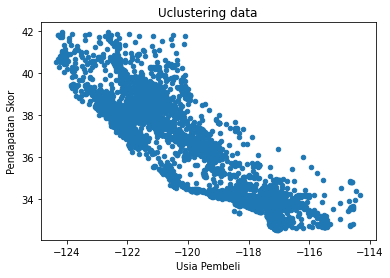

In [6]:
df.plot(kind='scatter', x='longitude',y='latitude')
plt.xlabel('Usia Pembeli')
plt.ylabel('Pendapatan Skor')
plt.title ('Uclustering data')
plt.show()

In [7]:
df = df[["longitude","longitude"]]
df.head()

,longitude,longitude
0,-122.23,-122.23
1,-122.22,-122.22
2,-122.24,-122.24
3,-122.25,-122.25
4,-122.25,-122.25


In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [9]:
centroids = kmeans.cluster_centers_
centroids

array([[-122.01514504, -122.01514504],
       [-117.85157278, -117.85157278],
       [-119.77718393, -119.77718393]])

In [10]:
kmeans.inertia_

14137.405148303777

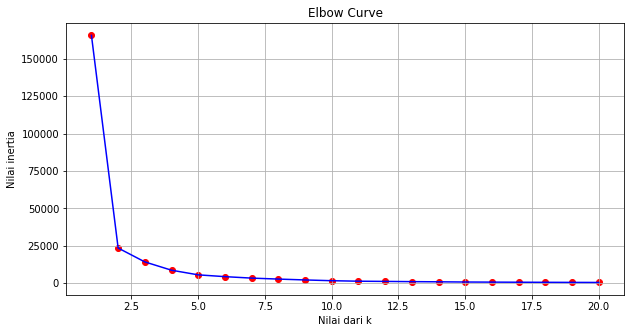

In [11]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai dari k')
plt.ylabel('Nilai inertia')
plt.title('Elbow Curve')
plt.show()

In [12]:
k =3
np.random.seed(40)

random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(-124,-114), np.random.randint(34,42)])
print('Randomly selected points as random_centroids:',random_centroids) 

Randomly selected points as random_centroids: [[-118, 37], [-117, 39], [-116, 34]]


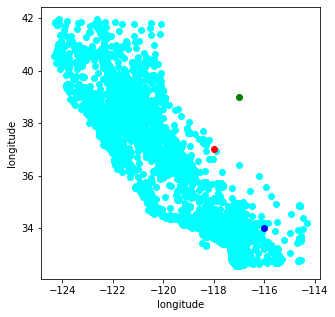

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1],color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
  plt.xlabel('longitude')
  plt.ylabel('longitude')
plt.show()

In [14]:
#Langkah kedua

#Di sini, kami menghitung jarak antara titik data dan centroid kami dan menugaskan setiap titik data ke cluster terdekat
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new

In [15]:
labels = kmeans.predict(df)
labels

array([ 1,  1,  1, ..., 11, 11, 11], dtype=int32)

In [16]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,longitude,latitude,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,-122.23,37.88,4.320567,5.348579,7.339435,0,r
1,-122.22,37.86,4.306739,5.343033,7.320383,0,r
2,-122.24,37.85,4.324361,5.364709,7.332128,0,r
3,-122.25,37.85,4.334167,5.374477,7.340640,0,r
4,-122.25,37.85,4.334167,5.374477,7.340640,0,r


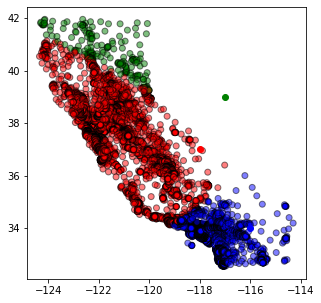

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'], alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
     